In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [2]:
from imblearn.over_sampling import SMOTE

In [3]:
df = pd.read_csv('Master_Clean.csv', index_col=0)

In [4]:
df.head()

,SEQN,Age,Heart_Rate,Irregular_Pulse,Systolic_BP_Avg,Diastolic_BP_Avg,Weight_kg,Height_cm,BMI,Waist_cm,...,Family_Income_5.0,Family_Income_6.0,Family_Income_7.0,Family_Income_8.0,Family_Income_9.0,Family_Income_10.0,Family_Income_12.0,Family_Income_13.0,Family_Income_14.0,Family_Income_15.0
0,83732.0,62.0,76.0,0.0,122.666667,65.333333,94.8,184.5,27.8,101.1,...,0,0,0,0,0,1,0,0,0,0
1,83733.0,53.0,72.0,0.0,140.000000,86.000000,90.4,171.4,30.8,107.9,...,0,0,0,0,0,0,0,0,0,0
2,83735.0,56.0,78.0,0.0,134.000000,70.000000,109.8,160.9,42.4,110.1,...,0,0,0,0,0,1,0,0,0,0
3,83736.0,42.0,76.0,0.0,104.000000,60.000000,55.2,164.9,20.3,80.4,...,0,0,1,0,0,0,0,0,0,0
4,83741.0,22.0,66.0,0.0,111.333333,72.666667,76.6,165.4,28.0,86.6,...,0,0,1,0,0,0,0,0,0,0


In [5]:
df.shape

(4423, 64)

In [6]:
df_target = df['Target']

In [7]:
df_features = df.drop(columns=['SEQN', 'Target'])

In [8]:
df_features.shape

(4423, 62)

In [9]:
sum(df_target==1)

80

In [10]:
sum(df_target==0)

4343

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.2)

In [12]:
sum(y_train==0)

3473

In [13]:
sum(y_train==1)

65

In [15]:
sm = SMOTE()

In [16]:
X_train, y_train = sm.fit_sample(X_train, y_train.ravel())

In [17]:
X_test, y_test = sm.fit_sample(X_test, y_test.ravel())

In [18]:
sum(y_train==0)

3473

In [19]:
sum(y_train==1)

3473

In [20]:
sum(y_test==0)

870

In [21]:
sum(y_test==1)

870

In [43]:
model = RandomForestClassifier(n_estimators=100, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

In [44]:
model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

In [45]:
train_rf_predictions = model.predict(X_train)
train_rf_probs = model.predict_proba(X_train)[:, 1]

rf_predictions = model.predict(X_test)
rf_probs = model.predict_proba(X_test)[:, 1]

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [48]:
def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(y_test, [1 for _ in range(len(y_test))])
    baseline['precision'] = precision_score(y_test, [1 for _ in range(len(y_test))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(y_test, predictions)
    results['precision'] = precision_score(y_test, predictions)
    results['roc'] = roc_auc_score(y_test, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(y_train, train_predictions)
    train_results['precision'] = precision_score(y_train, train_predictions)
    train_results['roc'] = roc_auc_score(y_train, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
    model_fpr, model_tpr, _ = roc_curve(y_test, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');

Recall Baseline: 1.0 Test: 0.89 Train: 1.0
Precision Baseline: 0.5 Test: 1.0 Train: 1.0
Roc Baseline: 0.5 Test: 1.0 Train: 1.0


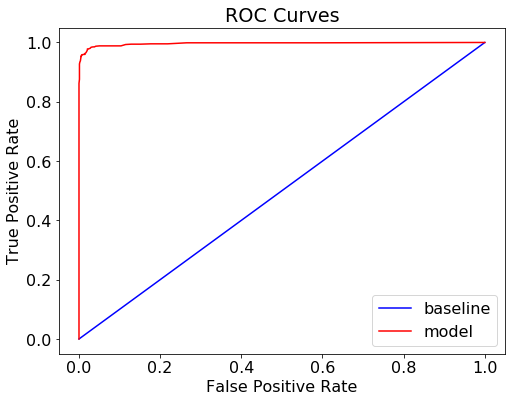

In [51]:
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)